In [1]:
import pandas as pd
import numpy as np
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

list_age = ['계','19~44','45~64','65~74','75 이상']
list_sex = ['계','남','여']
dic_df = {}

for z in range(0,10):
    for i in list_age:
        for j in list_sex:
            data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
            data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
            data2.rename(columns={'지역':'자치구'},inplace = True)
            df2 = data2[data2['연령별'] == i]
            df2 = df2[df2['성별'] == j]
            df2.set_index('자치구',inplace = True)
            data1.set_index('자치구',inplace = True)
            df = pd.concat([df2,data1],axis=1)
            df = df.drop(df.index[0])
            df = df.drop(['연령별','성별'],axis=1)
            dic_df[df.columns[z]+i+j] = df[[df.columns[z],'1인당 생활권 도시림 면적']]

In [2]:
data3 = pd.read_csv('../../raw/서울시 자치구 재정자립도_2019.csv')
data4 = pd.read_csv('../../raw/서울시 신고_등록 체육시설 통계_2019.csv')
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data3.set_index('자치구',inplace = True)
data4.set_index('자치구',inplace = True)
df = pd.concat([df2,data1,data3,data4],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)
df = df[['주관적 건강수준','체중조절 경험 여부','걷기 실천','격렬한 신체활동 실천','중등도 신체활동 실천',
         '주관적 스트레스 수준','우울감 경험률','행복감 지수','1인당 체육시설','1인당 생활권 도시림 면적','재정자립도','1인당 연소득']]
df.reset_index(inplace = True)

In [234]:
df5 = df[['걷기 실천','격렬한 신체활동 실천','중등도 신체활동 실천']]
df6 = df[['행복감 지수','주관적 건강수준','1인당 생활권 도시림 면적','1인당 연소득','재정자립도']]
df6

,행복감 지수,주관적 건강수준,1인당 생활권 도시림 면적,1인당 연소득,재정자립도
0,7.20,39.1,6.869465,2275.5,35.7
1,7.25,42.1,4.061179,2077.8,24.5
2,7.13,37.7,10.577379,1998.0,30.7
3,7.19,44.4,5.905544,1910.8,26.0
4,6.67,34.9,1.778059,1793.8,25.3
5,6.71,33.8,3.258437,1898.2,21.8
6,7.18,37.7,1.079721,1812.0,18.7
7,7.03,39.9,7.303483,1838.1,19.7
8,7.19,35.1,3.722101,2294.1,18.1
9,6.91,32.8,16.536911,2204.0,47.4


In [182]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

In [235]:
corr = df6.corr()
corr

,행복감 지수,주관적 건강수준,1인당 생활권 도시림 면적,1인당 연소득,재정자립도
행복감 지수,1.000000,0.702460,0.342430,0.629053,0.397033
주관적 건강수준,0.702460,1.000000,0.552591,0.615589,0.583957
1인당 생활권 도시림 면적,0.342430,0.552591,1.000000,0.687000,0.643910
1인당 연소득,0.629053,0.615589,0.687000,1.000000,0.715965
재정자립도,0.397033,0.583957,0.643910,0.715965,1.000000


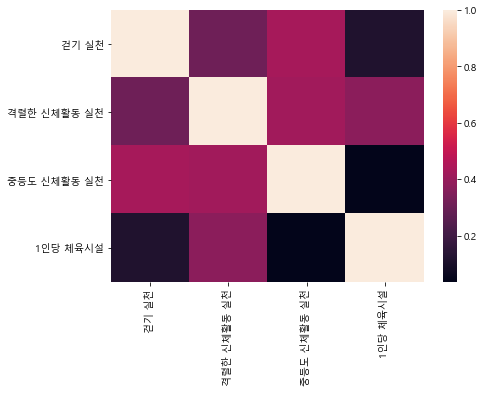

In [184]:
sns.heatmap(corr)
plt.rc('axes', unicode_minus=False)
plt.show()

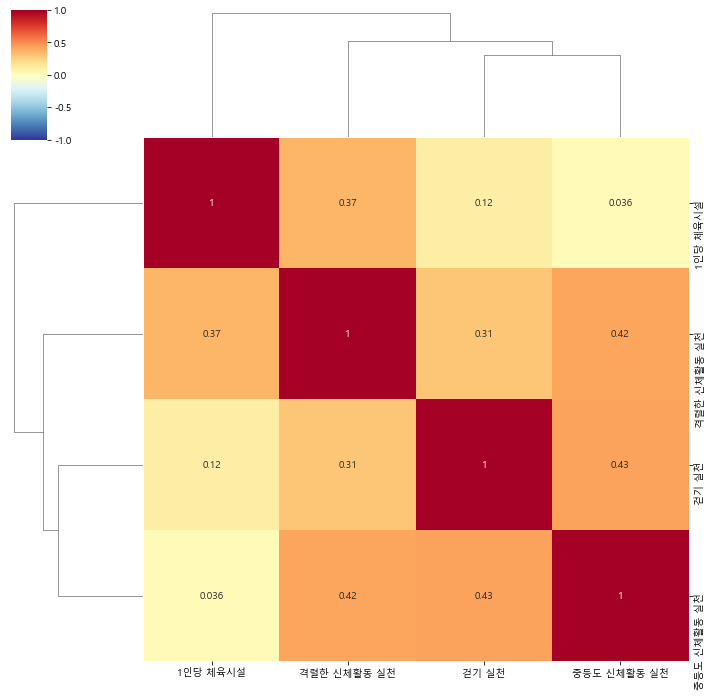

In [185]:
sns.clustermap(corr, annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax = 1)

<ipython-input-186-9109186c3b93>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


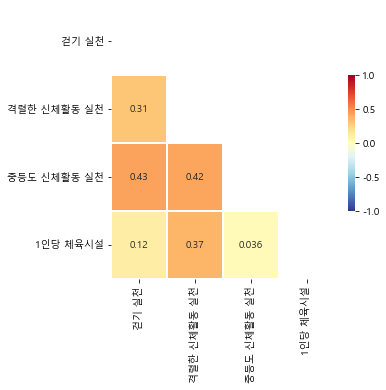

In [186]:
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(5,5) )


# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

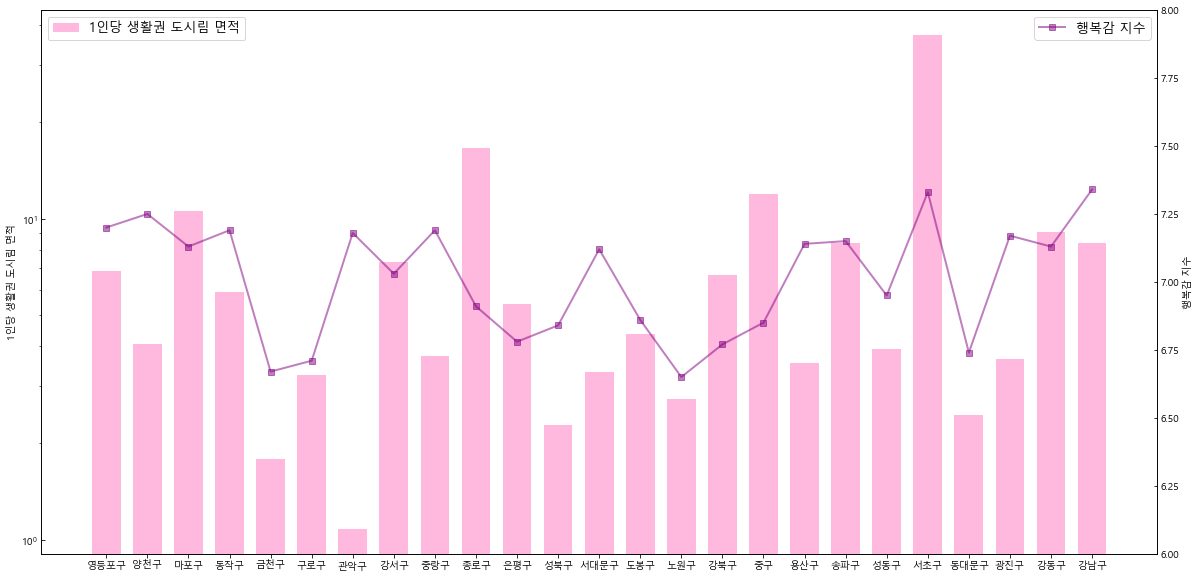

In [114]:
# 1. 기본 스타일 설정
#plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 10
# 3. 그래프 그리기
fig, ax2 = plt.subplots()
ax2.bar(df["자치구"], df["1인당 생활권 도시림 면적"], color='deeppink', label='1인당 생활권 도시림 면적', alpha=0.3, width=0.7)
ax2.set_ylabel('1인당 생활권 도시림 면적')
ax2.set_yscale('log')
plt.legend(loc=2,  fontsize=13)
ax1 = ax2.twinx()
ax1.plot(df["자치구"], df["행복감 지수"], '-s', color='purple', linewidth=2, alpha=0.5, label='행복감 지수')
ax1.set_xlabel('자치구')

ax1.set_ylabel('행복감 지수')
ax1.tick_params(axis='both', direction='in')
plt.legend(loc=1, fontsize=13)
plt.ylim([6,8])


#ax2.set_ylim(0, 18)
#ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')
plt.show()

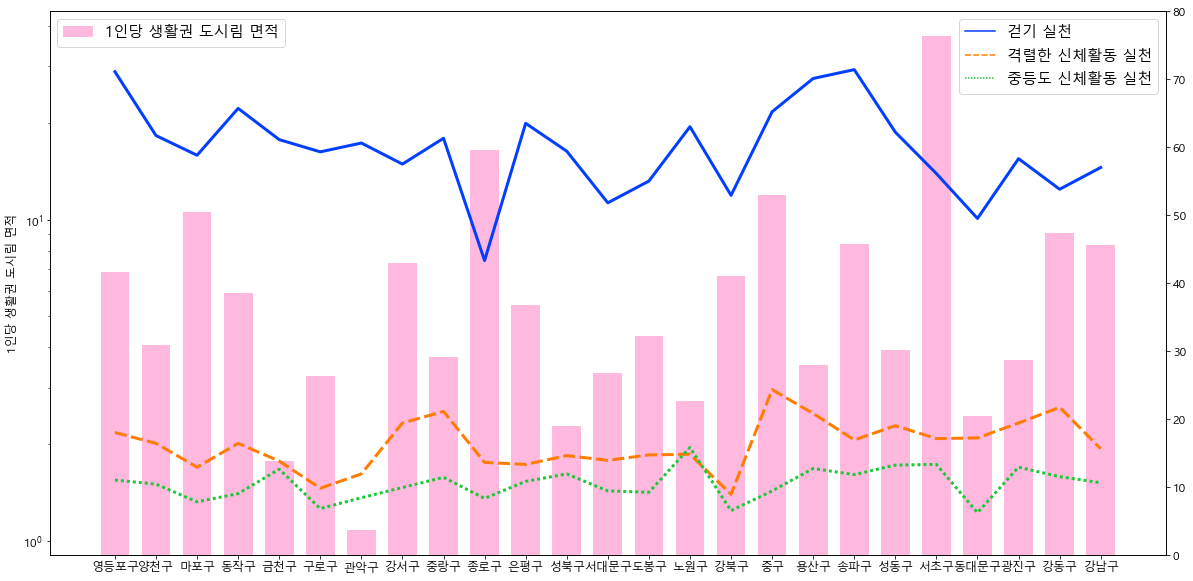

In [194]:
# 1. 기본 스타일 설정
#plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] =12
# 3. 그래프 그리기
fig, ax2 = plt.subplots()
ax2.bar(df["자치구"], df["1인당 생활권 도시림 면적"], color='deeppink', label='1인당 생활권 도시림 면적', alpha=0.3, width=0.7)
ax2.set_ylabel('1인당 생활권 도시림 면적')
ax2.set_yscale('log')
plt.legend(loc=2,  fontsize=15)
ax1 = ax2.twinx()
p = sns.lineplot(data=df5,linewidth=3.0)
plt.legend(loc=1, fontsize=15)
plt.ylim([0,80])


plt.show()

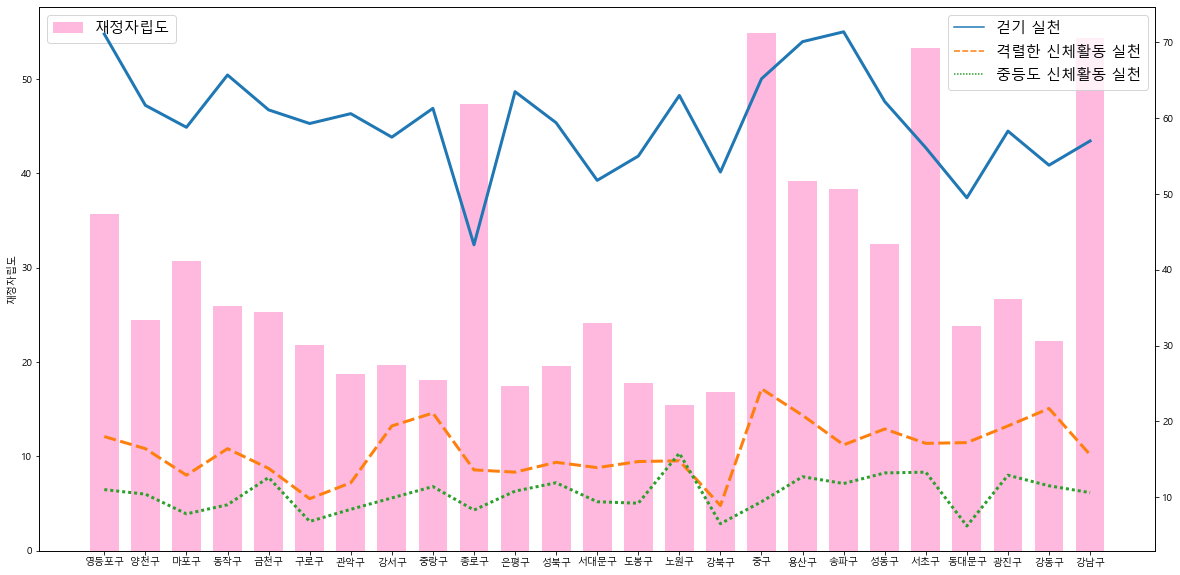

In [118]:
# 1. 기본 스타일 설정
#plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] =10
# 3. 그래프 그리기
fig, ax2 = plt.subplots()
ax2.bar(df["자치구"], df["재정자립도"], color='deeppink', label='재정자립도', alpha=0.3, width=0.7)
ax2.set_ylabel('재정자립도')
plt.legend(loc=2,  fontsize=15)
ax1 = ax2.twinx()
p = sns.lineplot(data=df5,linewidth=3.0)
plt.legend(loc=1, fontsize=15)



plt.show()

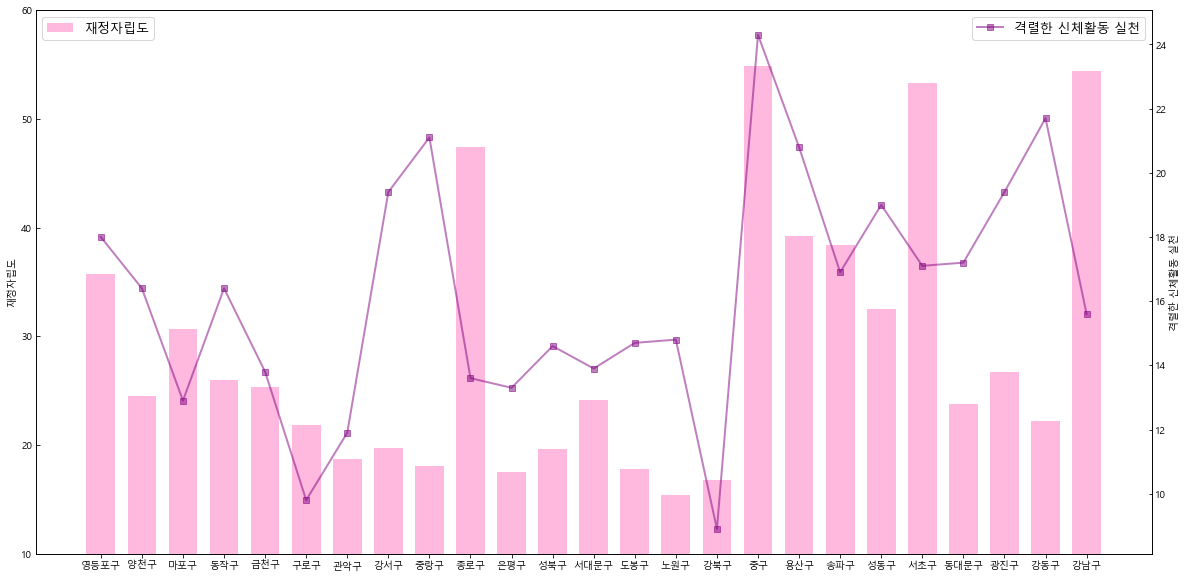

In [134]:
# 1. 기본 스타일 설정
#plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 10
# 3. 그래프 그리기
fig, ax2 = plt.subplots()
ax2.bar(df["자치구"], df["재정자립도"], color='deeppink', label='재정자립도', alpha=0.3, width=0.7)
ax2.set_ylabel('재정자립도')
plt.ylim(10,60)
plt.legend(loc=2,  fontsize=13)
ax1 = ax2.twinx()
ax1.plot(df["자치구"], df["격렬한 신체활동 실천"], '-s', color='purple', linewidth=2, alpha=0.5, label='격렬한 신체활동 실천')
ax1.set_xlabel('자치구')

ax1.set_ylabel('격렬한 신체활동 실천')
ax1.tick_params(axis='both', direction='in')
plt.legend(loc=1, fontsize=13)



#ax2.set_ylim(0, 18)
#ax2.set_ylabel(r'Demand ($\times10^6$)')
ax2.tick_params(axis='y', direction='in')
plt.show()

In [10]:
df11 = dic_df['주관적 건강수준'+'계계']
df11.rename(columns={df11.columns[0]: df11.columns[0].replace(' ','_'),df11.columns[1]: df11.columns[1].replace(' ','_')+'(㎡)'},inplace = True)
df11.columns

Index(['주관적_건강수준', '1인당_생활권_도시림_면적(㎡)(㎡)'], dtype='object')

In [150]:
df11 = dic_df['격렬한 신체활동 실천'+'계계']
df11.rename(columns={df11.columns[0]: df11.columns[0].replace(' ','_'),df11.columns[1]: df11.columns[1].replace(' ','_')+'(㎡)'},inplace = True)
df11.columns

Index(['격렬한_신체활동_실천', '1인당_생활권_도시림_면적(㎡)(㎡)'], dtype='object')

In [13]:
np.cov(df11[df11.columns[0]],df11[df11.columns[1]]) # 공분산 [0[1]

array([[ 4.53626667, -5.55007867],
       [-5.55007867, 52.95222843]])

In [18]:
stats.pearsonr(df11[df11.columns[0]],df11[df11.columns[1]]) #피어슨 상관계수, p value

(0.342429548157113, 0.0938191502467415)

C:\Users\gimhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='행복감_지수', ylabel='1인당_생활권_도시림_면적(㎡)(㎡)'>

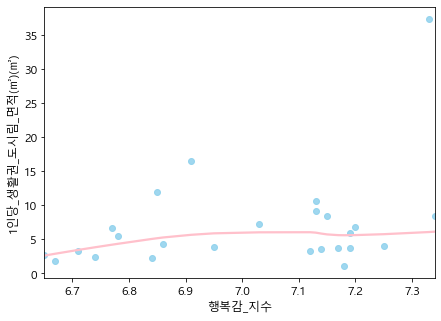

In [212]:
plt.rcParams['figure.figsize'] = (7, 5)
sns.set_palette("bright")
sns.regplot(df11.columns[0],df11.columns[1], lowess=True, data = df11,scatter_kws={"color": "skyblue",}, line_kws={"color": "pink"})

Text(0.5, 1.0, '행복감_지수')

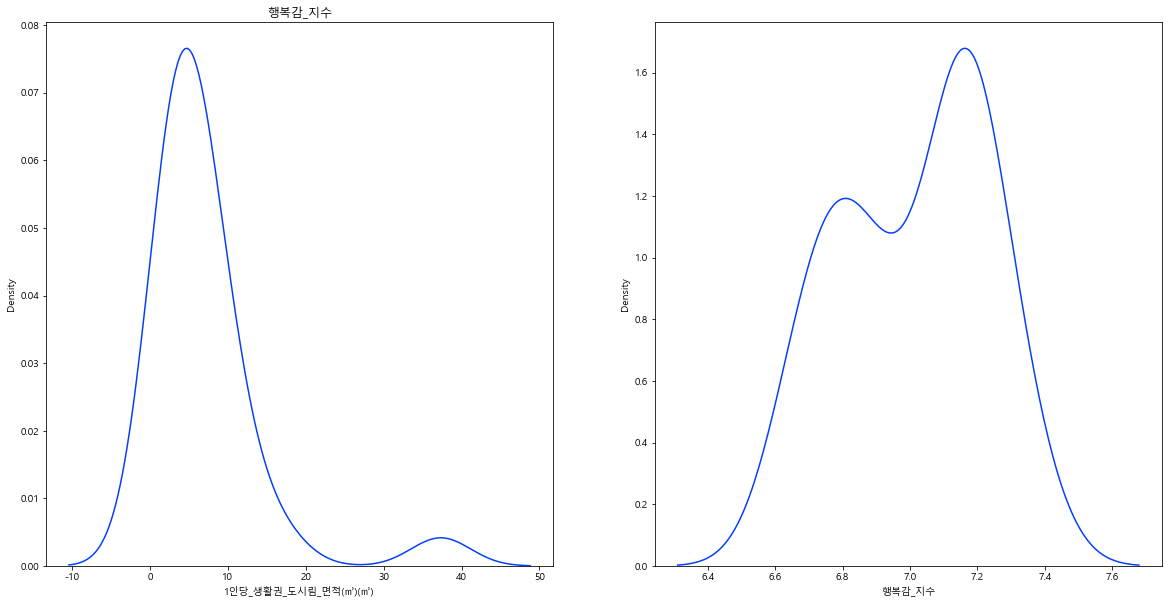

In [153]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df11[df11.columns[1]], ax=ax1)
ax1.set_title(df11.columns[1])

# dist의 밀도 플롯
sns.kdeplot(df11[df11.columns[0]], ax=ax2)
ax1.set_title(df11.columns[0])

In [24]:
df22 = df11.rename(columns={df11.columns[0]: '주관적_건강수준',df11.columns[1]: '_1인당_생활권_도시림_면적'})
model = smf.ols(formula = '주관적_건강수준 ~ _1인당_생활권_도시림_면적 -1', data = df22)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               주관적_건강수준   R-squared (uncentered):                   0.564
Model:                            OLS   Adj. R-squared (uncentered):              0.546
Method:                 Least Squares   F-statistic:                              31.09
Date:                Mon, 19 Jul 2021   Prob (F-statistic):                    9.76e-06
Time:                        11:28:46   Log-Likelihood:                         -117.15
No. Observations:                  25   AIC:                                      236.3
Df Residuals:                      24   BIC:                                      237.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
_1인당_생활권_도시림_면적     2.9918      0.537      5.576      0.000       1.884       4.099
==============================================================================
Omnibus:                       35.011   Durbin-Watson:                   1.132
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.540
Skew:                          -2.666   Prob(JB):                     2.19e-20
Kurtosis:                      10.648   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

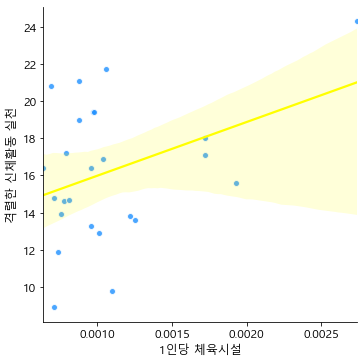

In [215]:
sns.lmplot(x=df6.columns[3], y=df6.columns[1], data=df6, line_kws={'color':"yellow"}, scatter_kws={'color':'dodgerblue','edgecolor':"white"})

In [267]:
A =corr.iloc[0:2][['1인당 생활권 도시림 면적','1인당 연소득','재정자립도']]
B= A.T.reset_index()
B

,index,행복감 지수,주관적 건강수준
0,1인당 생활권 도시림 면적,0.342430,0.552591
1,1인당 연소득,0.629053,0.615589
2,재정자립도,0.397033,0.583957


[0.  0.5 1. ]


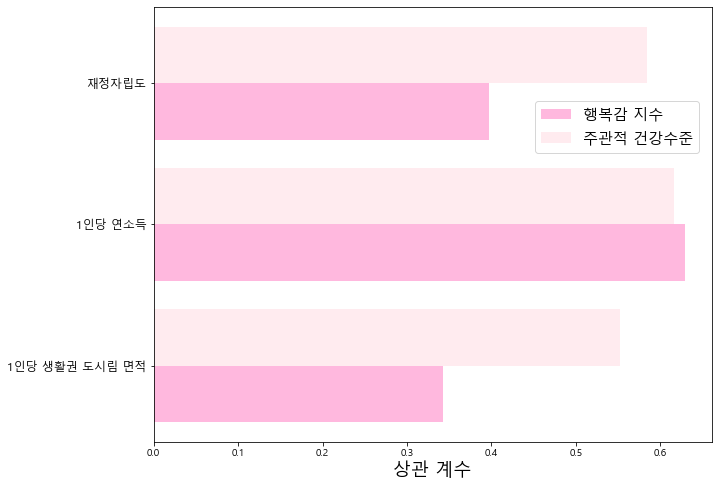

In [332]:
# 1. 기본 스타일 설정
#plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 10
# 3. 그래프 그리기

index = np.arange(3)/2
print(index)
label=['1인당 생활권 도시림 면적','1인당 연소득','재정자립도']

ax = plt.subplot()
p1 =ax.barh(index-0.1,B["행복감 지수"],height=0.2,color='deeppink', label='행복감 지수', alpha=0.3)
p2 =ax.barh(index+0.1,B["주관적 건강수준"], height=0.2,  color='pink', label='주관적 건강수준', alpha=0.3)

plt.xlabel('상관 계수', fontsize=18)


plt.legend((p1[0], p2[0]), ('행복감 지수', '주관적 건강수준'),loc='upper center', ncol=1, bbox_to_anchor=(0.83, 0.8), fontsize=15)


plt.yticks(index, label,fontsize=12)

plt.show()

2